In [1]:
# วีดีโอไหนถูกดูเป็นวีดีโอสุดท้ายมากที่สุดของคนที่เรียนไม่จบ
# วีดีโอที่ถูกคนจำนวนมากดูเป็นวีดีโอสุดท้ายถูกดูถึงวินาทีที่เท่าไหร่

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

%matplotlib inline

In [3]:
# import data
c1_user_log = pd.read_csv('c1_user_log.csv')
c2_user_log = pd.read_csv('c2_user_log.csv')

c1_watch_log = pd.read_csv('c1_watch_log.csv').drop('state', axis=1)
c2_watch_log = pd.read_csv('c2_watch_log.csv').drop('state', axis=1)

In [4]:
display(c1_user_log.head(2))
display(c2_user_log.head(2))
display(c1_watch_log.head(2))
display(c2_watch_log.head(2))

,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp,completed
0,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546826145,1
1,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,quiz_opened,D6RL6F8ZMBYOG1K31L0W,0ABQBRMJ41Q0IXJYQAF3,1546826475,1


,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp,completed
0,ATX0WILQ2Q5G5Y70RJF6,OTS26V4DL3U4LE4YHWAF,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544576600,0
1,HMWL4WPWYVS097LWWGQO,OTS26V4DL3U4LE4YHWAF,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544576664,0


,cv_uid,video_source_id,cliptime,timestamp,completed
0,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,0.276,1507515587,0
1,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,20.352,1507515607,0


,cv_uid,video_source_id,cliptime,timestamp,completed
0,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,0.347,1513045596,1
1,DBP8GUBZJHYFB45A7S1O,T6Q8A9B342NEF9ZJ7BIO,20.346,1513045617,1


In [5]:
# video order array
c1_video_array = ['X45GUK10ISXE8PQPT33Q', '22QQ8REDRNY0GIBK780I', 'M80C0QBHIMI8HZNOL2YU',
                  'OMQY8CN76XAIWF2XWOC8', 'TSSQYRQLKEY8RAFWHTHO', '0M5Z309G9YI2BELUBNLL',
                  'CG4GJXAC96NBYEDDLPO7', 'ZNJWNCV86I70W5AI5NSY', 'EKXGW57W6WKSR2C51OXB',
                  'M8N4OQ4XCA1R30I2ME2N', 'MKBG4VRRT3UKNKH8SVAB', 'FG934YQAMFWK6IVMHG8T',
                  'X33IDN7BULXO60A1TPJJ', 'NR487QF1859CUSLGB9AX', 'NECTJKSOSXTXLW4RWSGM']

c2_video_array = ['T6Q8A9B342NEF9ZJ7BIO', 'L7GKVNOCE5HPUQYWJE9D', 'H26PSA20BYGQLIOY7114',
                  'THY3KPF3GESAW9541JUS', 'FUDZ902HU33PJAK0945S', '8SFIHFBQYX6T2NDVA5KU',
                  '8ZB56TQZ5EG6MWJRR9IM', 'TWMCN5LP6IDKZB53XHLT', 'RQU5D4YH5PNEXV69PKHF',
                  '6XNGK2T4DU8BUIAXWDBY', 'X7FLQ6LCLJLBTXKHVEV4']

In [6]:
# filter not completed user watch log in each course
c1_ntcom_wlog = c1_watch_log[c1_watch_log['completed'] == 0]
c2_ntcom_wlog = c2_watch_log[c2_watch_log['completed'] == 0]

# filter only last video of each user in each course
c1_last_video = c1_ntcom_wlog.drop_duplicates('cv_uid', keep='last')
c2_last_video = c2_ntcom_wlog.drop_duplicates('cv_uid', keep='last')

In [7]:
# number of users not completed each course
print("Course 1:")
print("Total users not completed: " + str(c1_last_video['cv_uid'].nunique()))
display(c1_last_video['video_source_id'].value_counts())

print('\n')
print("Course 2:")
print("Total users not completed: " + str(c2_last_video['cv_uid'].nunique()))
display(c2_last_video['video_source_id'].value_counts())

Course 1:
Total users not completed: 996


X45GUK10ISXE8PQPT33Q    334
22QQ8REDRNY0GIBK780I    198
TSSQYRQLKEY8RAFWHTHO     85
M80C0QBHIMI8HZNOL2YU     71
OMQY8CN76XAIWF2XWOC8     56
NECTJKSOSXTXLW4RWSGM     55
0M5Z309G9YI2BELUBNLL     51
M8N4OQ4XCA1R30I2ME2N     48
EKXGW57W6WKSR2C51OXB     21
CG4GJXAC96NBYEDDLPO7     19
MKBG4VRRT3UKNKH8SVAB     15
ZNJWNCV86I70W5AI5NSY     14
FG934YQAMFWK6IVMHG8T     13
NR487QF1859CUSLGB9AX     12
X33IDN7BULXO60A1TPJJ      4
Name: video_source_id, dtype: int64



Course 2:
Total users not completed: 858


T6Q8A9B342NEF9ZJ7BIO    293
H26PSA20BYGQLIOY7114    136
L7GKVNOCE5HPUQYWJE9D    117
THY3KPF3GESAW9541JUS    108
FUDZ902HU33PJAK0945S     51
X7FLQ6LCLJLBTXKHVEV4     41
8ZB56TQZ5EG6MWJRR9IM     32
8SFIHFBQYX6T2NDVA5KU     30
TWMCN5LP6IDKZB53XHLT     19
6XNGK2T4DU8BUIAXWDBY     17
RQU5D4YH5PNEXV69PKHF     14
Name: video_source_id, dtype: int64

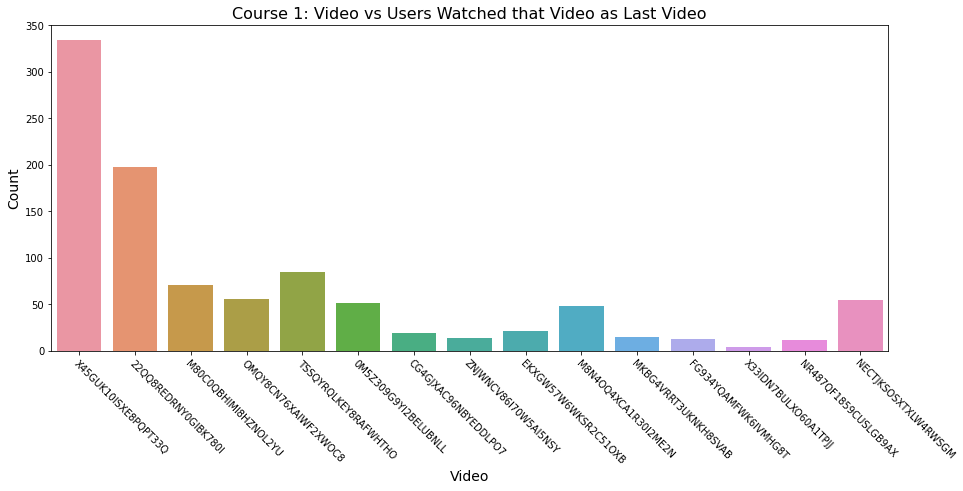

In [42]:
# visualize number of users watched each video as last video @ course 1
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=c1_last_video['video_source_id'], order=c1_video_array, ax=ax)
ax.set_title('Course 1: Video vs Users Watched that Video as Last Video', size=16)
ax.set_xlabel('Video', size=14)
ax.set_ylabel('Count', size=14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor");

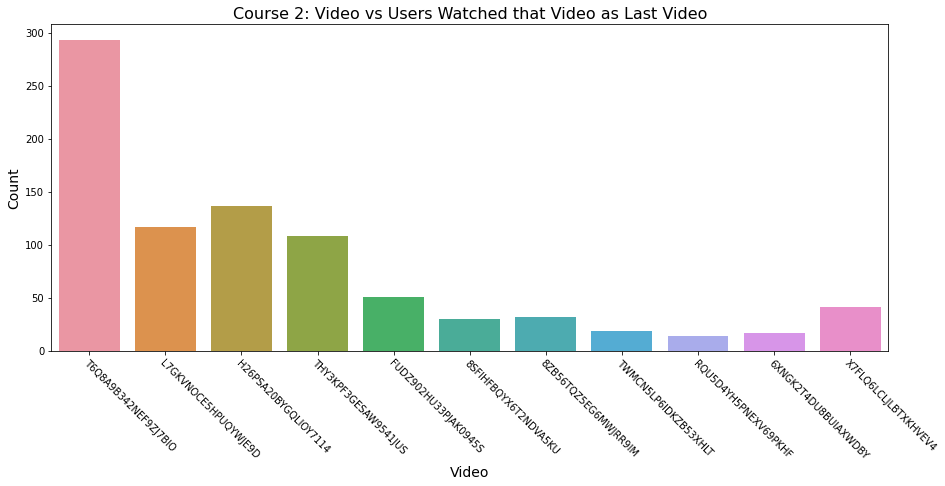

In [43]:
# visualize number of users watched each video as last video @ course 1
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=c2_last_video['video_source_id'], order=c2_video_array, ax=ax)
ax.set_title('Course 2: Video vs Users Watched that Video as Last Video', size=16)
ax.set_xlabel('Video', size=14)
ax.set_ylabel('Count', size=14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor");

In [11]:
# create csv file for state diagram
display(c1_ntcom_wlog.head())
display(c2_ntcom_wlog.head())

,cv_uid,video_source_id,cliptime,timestamp,completed
0,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,0.276,1507515587,0
1,MI0EO2X8OQEOH6454BFA,X45GUK10ISXE8PQPT33Q,20.352,1507515607,0
2,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.517,1507515712,0
3,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,0.243,1507520603,0
4,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,20.236,1507520620,0


,cv_uid,video_source_id,cliptime,timestamp,completed
16,OSHMZB0QRI21W2GZ3ELZ,T6Q8A9B342NEF9ZJ7BIO,0.621,1513047574,0
17,OSHMZB0QRI21W2GZ3ELZ,T6Q8A9B342NEF9ZJ7BIO,20.367,1513047594,0
18,OSHMZB0QRI21W2GZ3ELZ,T6Q8A9B342NEF9ZJ7BIO,40.367,1513047614,0
19,OSHMZB0QRI21W2GZ3ELZ,T6Q8A9B342NEF9ZJ7BIO,60.367,1513047634,0
20,OSHMZB0QRI21W2GZ3ELZ,T6Q8A9B342NEF9ZJ7BIO,80.368,1513047654,0


In [12]:
# filter only last watch log of each video that each user watch in each course
# first open & last watch
c1_open_each_video = c1_ntcom_wlog.drop_duplicates(['cv_uid', 'video_source_id'], keep='first').copy()
c1_last_each_video = c1_ntcom_wlog.drop_duplicates(['cv_uid', 'video_source_id'], keep='last').copy()

c2_open_each_video = c2_ntcom_wlog.drop_duplicates(['cv_uid', 'video_source_id'], keep='first').copy()
c2_last_each_video = c2_ntcom_wlog.drop_duplicates(['cv_uid', 'video_source_id'], keep='last').copy()

In [13]:
c1_open_keep_last = c1_open_each_video.drop_duplicates('cv_uid', keep='last')
c1_last_keep_last = c1_last_each_video.drop_duplicates('cv_uid', keep='last')

c2_open_keep_last = c2_open_each_video.drop_duplicates('cv_uid', keep='last')
c2_last_keep_last = c2_last_each_video.drop_duplicates('cv_uid', keep='last')

In [14]:
# method 1: drop duplicate at cv_uid and keep last
c1_method1 = pd.DataFrame(c1_last_video['video_source_id'].value_counts())
c2_method1 = pd.DataFrame(c2_last_video['video_source_id'].value_counts())

# method 2: drop duplicate at cv_uid & video_source_id and keep first
# then drop duplicate at cv_uid and keep last
c1_method2 = pd.DataFrame(c1_open_keep_last['video_source_id'].value_counts())
c2_method2 = pd.DataFrame(c2_open_keep_last['video_source_id'].value_counts())

# method 3: drop duplicate at cv_uid & video_source_id and keep last
# then drop duplicate at cv_uid and keep last
c1_method3 = pd.DataFrame(c1_last_keep_last['video_source_id'].value_counts())
c2_method3 = pd.DataFrame(c2_last_keep_last['video_source_id'].value_counts())

In [15]:
c1_compare_method = c1_method1.merge(c1_method2, how='outer', left_index=True,
                                     right_index=True, suffixes=('', '_2'))
c1_compare_method = c1_compare_method.merge(c1_method3, how='outer', left_index=True,
                                            right_index=True, suffixes=('', '_3'))

c2_compare_method = c2_method1.merge(c2_method2, how='outer', left_index=True,
                                     right_index=True, suffixes=('', '_2'))
c2_compare_method = c2_compare_method.merge(c2_method3, how='outer', left_index=True,
                                            right_index=True, suffixes=('', '_3'))

In [16]:
c1_compare_method

,video_source_id,video_source_id_2,video_source_id_3
0M5Z309G9YI2BELUBNLL,51,51,51
22QQ8REDRNY0GIBK780I,198,199,198
CG4GJXAC96NBYEDDLPO7,19,21,19
EKXGW57W6WKSR2C51OXB,21,21,21
FG934YQAMFWK6IVMHG8T,13,13,13
M80C0QBHIMI8HZNOL2YU,71,72,71
M8N4OQ4XCA1R30I2ME2N,48,48,48
MKBG4VRRT3UKNKH8SVAB,15,16,15
NECTJKSOSXTXLW4RWSGM,55,60,55
NR487QF1859CUSLGB9AX,12,16,12


In [17]:
c2_compare_method

,video_source_id,video_source_id_2,video_source_id_3
T6Q8A9B342NEF9ZJ7BIO,293,284,293
H26PSA20BYGQLIOY7114,136,143,136
L7GKVNOCE5HPUQYWJE9D,117,115,117
THY3KPF3GESAW9541JUS,108,109,108
FUDZ902HU33PJAK0945S,51,49,51
X7FLQ6LCLJLBTXKHVEV4,41,47,41
8ZB56TQZ5EG6MWJRR9IM,32,34,32
8SFIHFBQYX6T2NDVA5KU,30,30,30
TWMCN5LP6IDKZB53XHLT,19,19,19
6XNGK2T4DU8BUIAXWDBY,17,14,17


In [18]:
# must use last of each video

In [19]:
# order video with timestamp function
def order(row, wlog):
  u_wlog = wlog[wlog['cv_uid'] == row['cv_uid']]
  u_wlog.reset_index(drop=True, inplace=True)
  order = u_wlog[u_wlog['video_source_id'] == row['video_source_id']].index[0]
  return order + 101

In [20]:
# create order column
c1_last_each_video['order'] = c1_last_each_video.apply(lambda r: order(r, c1_last_each_video), axis=1)

c2_last_each_video['order'] = c2_last_each_video.apply(lambda r: order(r, c2_last_each_video), axis=1)

In [21]:
display(c1_last_each_video.head())
display(c2_last_each_video.head())

,cv_uid,video_source_id,cliptime,timestamp,completed,order
19,ZTMGT2XES5SP5HEP7136,X45GUK10ISXE8PQPT33Q,177.139,1507521069,0,101
55,ZTMGT2XES5SP5HEP7136,22QQ8REDRNY0GIBK780I,394.563,1507522780,0,102
68,ZTMGT2XES5SP5HEP7136,M80C0QBHIMI8HZNOL2YU,128.305,1507523537,0,103
75,ZTMGT2XES5SP5HEP7136,OMQY8CN76XAIWF2XWOC8,70.375,1507523832,0,104
108,ZTMGT2XES5SP5HEP7136,TSSQYRQLKEY8RAFWHTHO,374.973,1507524422,0,105


,cv_uid,video_source_id,cliptime,timestamp,completed,order
78,NVMBB7GEKFQ5TW8RF8LC,T6Q8A9B342NEF9ZJ7BIO,350.447,1513049928,0,101
102,NVMBB7GEKFQ5TW8RF8LC,L7GKVNOCE5HPUQYWJE9D,77.680,1513050398,0,102
165,NVMBB7GEKFQ5TW8RF8LC,H26PSA20BYGQLIOY7114,251.941,1513052385,0,103
180,TDYOFYKGV7JMNICUG4EY,T6Q8A9B342NEF9ZJ7BIO,213.379,1513084813,0,101
212,T4UPK6FEF54WXVNPLEFT,T6Q8A9B342NEF9ZJ7BIO,362.349,1513088387,0,101


In [22]:
# create pivot table of each course
c1_state_diagram = pd.pivot_table(c1_last_each_video, index='cv_uid',
                                  columns='video_source_id', values='order')

c2_state_diagram = pd.pivot_table(c2_last_each_video, index='cv_uid',
                                  columns='video_source_id', values='order')

In [23]:
display(c1_state_diagram.head())
display(c2_state_diagram.head())

video_source_id,0M5Z309G9YI2BELUBNLL,22QQ8REDRNY0GIBK780I,CG4GJXAC96NBYEDDLPO7,EKXGW57W6WKSR2C51OXB,FG934YQAMFWK6IVMHG8T,M80C0QBHIMI8HZNOL2YU,M8N4OQ4XCA1R30I2ME2N,MKBG4VRRT3UKNKH8SVAB,NECTJKSOSXTXLW4RWSGM,NR487QF1859CUSLGB9AX,OMQY8CN76XAIWF2XWOC8,TSSQYRQLKEY8RAFWHTHO,X33IDN7BULXO60A1TPJJ,X45GUK10ISXE8PQPT33Q,ZNJWNCV86I70W5AI5NSY
cv_uid,,,,,,,,,,,,,,,
00OHUQV3CASQW555NSQF,106.0,102.0,NaN,NaN,NaN,103.0,NaN,NaN,NaN,NaN,104.0,105.0,NaN,101.0,NaN
01DZG5B95R3OMVTN9XPR,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0
03LP1SBXNEIX4GFNMEVJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN
03NX8SJ1VUBPSP0JCXAP,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN
061RID3VYWFCDZVRO53N,106.0,102.0,107.0,109.0,112.0,103.0,110.0,111.0,115.0,114.0,104.0,105.0,113.0,101.0,108.0


video_source_id,6XNGK2T4DU8BUIAXWDBY,8SFIHFBQYX6T2NDVA5KU,8ZB56TQZ5EG6MWJRR9IM,FUDZ902HU33PJAK0945S,H26PSA20BYGQLIOY7114,L7GKVNOCE5HPUQYWJE9D,RQU5D4YH5PNEXV69PKHF,T6Q8A9B342NEF9ZJ7BIO,THY3KPF3GESAW9541JUS,TWMCN5LP6IDKZB53XHLT,X7FLQ6LCLJLBTXKHVEV4
cv_uid,,,,,,,,,,,
01CCR671TEBH7GJ04YW3,NaN,NaN,NaN,NaN,103.0,102.0,NaN,101.0,NaN,NaN,NaN
036CY11OPT8FBH5NHI9H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN
05GHGETJ9FT0RTELETO4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN
05NK0BDO826EF6ERQSSL,NaN,NaN,NaN,NaN,103.0,102.0,NaN,101.0,NaN,NaN,NaN
07N00KX8UQOYKTZC41EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN


In [24]:
c1_state_diagram = c1_state_diagram[c1_video_array]
c2_state_diagram = c2_state_diagram[c2_video_array]

In [25]:
display(c1_state_diagram.head())
display(c2_state_diagram.head())

video_source_id,X45GUK10ISXE8PQPT33Q,22QQ8REDRNY0GIBK780I,M80C0QBHIMI8HZNOL2YU,OMQY8CN76XAIWF2XWOC8,TSSQYRQLKEY8RAFWHTHO,0M5Z309G9YI2BELUBNLL,CG4GJXAC96NBYEDDLPO7,ZNJWNCV86I70W5AI5NSY,EKXGW57W6WKSR2C51OXB,M8N4OQ4XCA1R30I2ME2N,MKBG4VRRT3UKNKH8SVAB,FG934YQAMFWK6IVMHG8T,X33IDN7BULXO60A1TPJJ,NR487QF1859CUSLGB9AX,NECTJKSOSXTXLW4RWSGM
cv_uid,,,,,,,,,,,,,,,
00OHUQV3CASQW555NSQF,101.0,102.0,103.0,104.0,105.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01DZG5B95R3OMVTN9XPR,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
03LP1SBXNEIX4GFNMEVJ,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03NX8SJ1VUBPSP0JCXAP,101.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
061RID3VYWFCDZVRO53N,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0


video_source_id,T6Q8A9B342NEF9ZJ7BIO,L7GKVNOCE5HPUQYWJE9D,H26PSA20BYGQLIOY7114,THY3KPF3GESAW9541JUS,FUDZ902HU33PJAK0945S,8SFIHFBQYX6T2NDVA5KU,8ZB56TQZ5EG6MWJRR9IM,TWMCN5LP6IDKZB53XHLT,RQU5D4YH5PNEXV69PKHF,6XNGK2T4DU8BUIAXWDBY,X7FLQ6LCLJLBTXKHVEV4
cv_uid,,,,,,,,,,,
01CCR671TEBH7GJ04YW3,101.0,102.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
036CY11OPT8FBH5NHI9H,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05GHGETJ9FT0RTELETO4,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05NK0BDO826EF6ERQSSL,101.0,102.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07N00KX8UQOYKTZC41EN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
def col_rename(video_array):
  col_dict = {}
  count = 1
  for video in video_array:
    col_dict[video] = 'V' + str(count)
    count += 1

  return col_dict

In [27]:
# create column name array
c1_col_name = col_rename(c1_video_array)
c2_col_name = col_rename(c2_video_array)

In [28]:
print(c1_col_name)
print(c2_col_name)

{'X45GUK10ISXE8PQPT33Q': 'V1', '22QQ8REDRNY0GIBK780I': 'V2', 'M80C0QBHIMI8HZNOL2YU': 'V3', 'OMQY8CN76XAIWF2XWOC8': 'V4', 'TSSQYRQLKEY8RAFWHTHO': 'V5', '0M5Z309G9YI2BELUBNLL': 'V6', 'CG4GJXAC96NBYEDDLPO7': 'V7', 'ZNJWNCV86I70W5AI5NSY': 'V8', 'EKXGW57W6WKSR2C51OXB': 'V9', 'M8N4OQ4XCA1R30I2ME2N': 'V10', 'MKBG4VRRT3UKNKH8SVAB': 'V11', 'FG934YQAMFWK6IVMHG8T': 'V12', 'X33IDN7BULXO60A1TPJJ': 'V13', 'NR487QF1859CUSLGB9AX': 'V14', 'NECTJKSOSXTXLW4RWSGM': 'V15'}
{'T6Q8A9B342NEF9ZJ7BIO': 'V1', 'L7GKVNOCE5HPUQYWJE9D': 'V2', 'H26PSA20BYGQLIOY7114': 'V3', 'THY3KPF3GESAW9541JUS': 'V4', 'FUDZ902HU33PJAK0945S': 'V5', '8SFIHFBQYX6T2NDVA5KU': 'V6', '8ZB56TQZ5EG6MWJRR9IM': 'V7', 'TWMCN5LP6IDKZB53XHLT': 'V8', 'RQU5D4YH5PNEXV69PKHF': 'V9', '6XNGK2T4DU8BUIAXWDBY': 'V10', 'X7FLQ6LCLJLBTXKHVEV4': 'V11'}


In [29]:
# rename state diagram column
c1_state_diagram.rename(columns=c1_col_name, inplace=True)
c2_state_diagram.rename(columns=c2_col_name, inplace=True)

In [30]:
display(c1_state_diagram.head())
display(c2_state_diagram.head())

video_source_id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
cv_uid,,,,,,,,,,,,,,,
00OHUQV3CASQW555NSQF,101.0,102.0,103.0,104.0,105.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01DZG5B95R3OMVTN9XPR,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
03LP1SBXNEIX4GFNMEVJ,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03NX8SJ1VUBPSP0JCXAP,101.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
061RID3VYWFCDZVRO53N,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0


video_source_id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cv_uid,,,,,,,,,,,
01CCR671TEBH7GJ04YW3,101.0,102.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
036CY11OPT8FBH5NHI9H,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05GHGETJ9FT0RTELETO4,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05NK0BDO826EF6ERQSSL,101.0,102.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07N00KX8UQOYKTZC41EN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# export csv file
c1_state_diagram.to_csv('c1_state_diagram.csv', index=False)
c2_state_diagram.to_csv('c2_state_diagram.csv', index=False)

In [32]:
c1_test = pd.read_csv('c1_state_diagram.csv')
c2_test = pd.read_csv('c2_state_diagram.csv')

display(c1_test.head())
display(c2_test.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,101.0,102.0,103.0,104.0,105.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0
2,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,101.0,102.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101.0,102.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# เลือกวีดีโอที่คนออกเยอะ ๆ เห็นแล้วมีความต่าง
c1_famous_array = ['X45GUK10ISXE8PQPT33Q', '22QQ8REDRNY0GIBK780I']

c2_famous_array = ['T6Q8A9B342NEF9ZJ7BIO', 'L7GKVNOCE5HPUQYWJE9D', 'H26PSA20BYGQLIOY7114',
                  'THY3KPF3GESAW9541JUS']

In [34]:
c1_famous_last = c1_last_video[c1_last_video['video_source_id'].isin(c1_famous_array)]
c2_famous_last = c2_last_video[c2_last_video['video_source_id'].isin(c2_famous_array)]

In [35]:
print(c1_famous_last['video_source_id'].nunique())
print(c2_famous_last['video_source_id'].nunique())

2
4


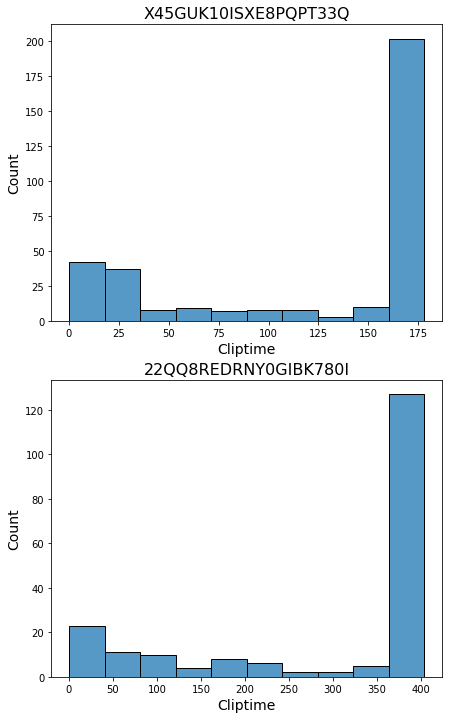

In [41]:
fig, ax = plt.subplots(len(c1_famous_array), 1, figsize=(7, len(c1_famous_array)*6))

for i in range(len(c1_famous_array)):
  video = c1_famous_last[c1_famous_last['video_source_id'] == c1_famous_array[i]]
  bins = int(np.round(video['cliptime'].max() / (video['cliptime'].max() * 0.1)))
  sns.histplot(x=video['cliptime'], bins=bins, ax=ax[i])
  ax[i].set_xlabel('Cliptime', size=14)
  ax[i].set_ylabel('Count', size=14)
  ax[i].set_title(c1_famous_array[i], size=16)

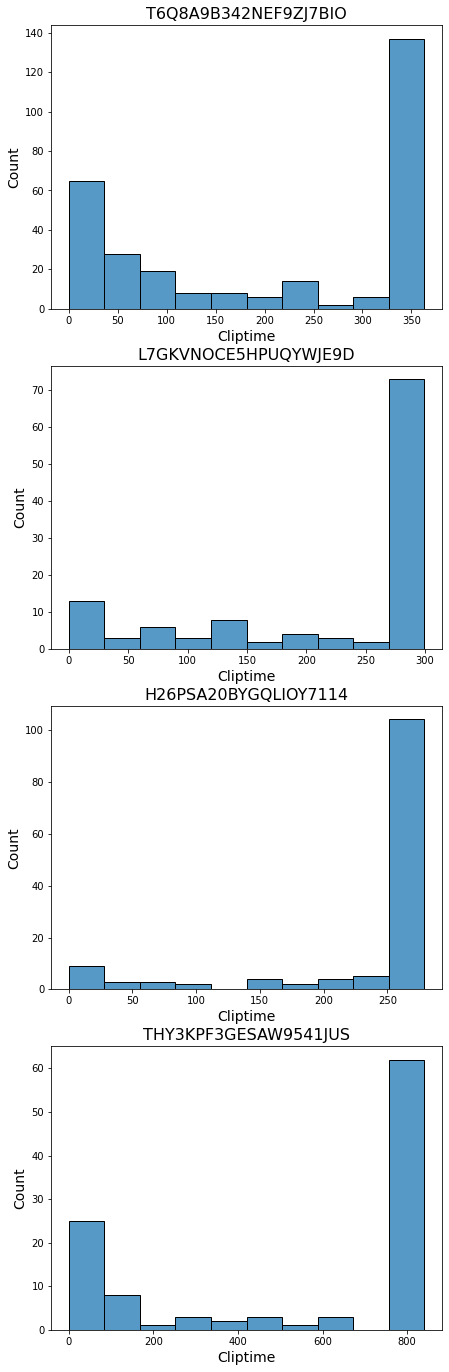

In [45]:
fig, ax = plt.subplots(len(c2_famous_array), 1, figsize=(7, len(c2_famous_array)*6))

for i in range(len(c2_famous_array)):
  video = c2_famous_last[c2_famous_last['video_source_id'] == c2_famous_array[i]]
  bins = int(np.round(video['cliptime'].max() / (video['cliptime'].max() * 0.1)))
  sns.histplot(x=video['cliptime'], bins=bins, ax=ax[i])
  ax[i].set_xlabel('Cliptime', size=14)
  ax[i].set_ylabel('Count', size=14)
  ax[i].set_title(c2_famous_array[i], size=16)